# 1. Data loading and visualization

In [419]:
# load useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing,linear_model, metrics
import time
%matplotlib inline

np.random.seed(1)

In [420]:
# we display the description of the features
with open('data/features.txt', 'r') as f:
    for line in f:
        print(line)
#!cat data/kaggle_data/features.txt

nb_words_title  Number of words in the article's titles

nb_words_content  Number of words in the article

pp_uniq_words  Proportion of unique words in the article

pp_stop_words  Proportion of stop words (i.e. words predefined to be too common to be of use for interpretation or queries, such as 'the', 'a', 'and', etc.)

pp_uniq_non-stop_words  Proportion of non-stop words among unique words

nb_links  Number of hyperlinks in the article

nb_outside_links  Number of hyperlinks pointing to another website

nb_images  Number of images in the article

nb_videos  Number of videos in the article

ave_word_length  Average word length

nb_keywords  Number of keywords in the metadata

category  Category of the article: 0-Lifestyle, 1-Entertainment, 2-Business, 3-Web, 4-Tech, 5-World

nb_mina_mink  Minimum number of share counts among all articles with at least one keyword in common with the article

nb_mina_maxk  Minimum number of maximum share counts per keyword

nb_mina_avek  Minimum number 

In [421]:
feature_data = pd.read_csv('data/features.txt', header=None, sep="  ", engine='python', names=['feature_names', 'feature_description'])
feature_data.head(5)

,feature_names,feature_description
0,nb_words_title,Number of words in the article's titles
1,nb_words_content,Number of words in the article
2,pp_uniq_words,Proportion of unique words in the article
3,pp_stop_words,Proportion of stop words (i.e. words predefine...
4,pp_uniq_non-stop_words,Proportion of non-stop words among unique words


In [422]:
feature_data.shape

(43, 2)

In [423]:
target_data = pd.read_csv('data/train-targets.csv', sep=",")
target_data.head(5)

,Id,Prediction
0,2000,882
1,2001,1102
2,2002,1102
3,2003,1001
4,2004,1603


(0, 10000)

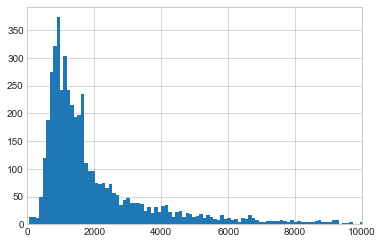

In [424]:
y_tr = target_data['Prediction'].values
plt.hist(y_tr,bins=2000)
plt.xlim((0,10000))

In [425]:
list_feature_names = list(feature_data['feature_names'])

train_data = pd.read_csv('data/train.csv', header=None, sep=" ", names=list_feature_names)
train_data.head(10)

,nb_words_title,nb_words_content,pp_uniq_words,pp_stop_words,pp_uniq_non-stop_words,nb_links,nb_outside_links,nb_images,nb_videos,ave_word_length,...,pp_neg_words,pp_pos_words_in_nonneutral,ave_polar_pos,min_polar_pos,max_polar_pos,ave_polar_neg,min_polar_neg,max_polar_neg,subj_title,polar_title
2000,9,843,0.5358,2.092000e-09,0.7469,15.0,8,11,1,4,...,0.019230,0.7143,0.4437,0.03333,1.0,-0.3160,-0.8000,-0.050000,0.0,0.0
2001,9,805,0.4196,2.165000e-09,0.5693,8.0,7,1,0,4,...,0.025710,0.5349,0.3081,0.05000,0.8,-0.3463,-0.7143,-0.100000,0.9,0.3
2002,8,145,0.7594,1.163000e-08,0.8488,7.0,3,0,2,4,...,0.007519,0.8333,0.3673,0.13640,0.5,-0.2000,-0.2000,-0.200000,0.0,0.0
2003,12,201,0.6359,9.259000e-09,0.8148,7.0,2,0,0,4,...,0.027030,0.7368,0.3721,0.13640,0.6,-0.4000,-0.4000,-0.400000,0.0,0.0
2004,13,673,0.4609,2.500000e-09,0.5950,8.0,7,1,0,4,...,0.021440,0.5625,0.3500,0.05000,0.6,-0.2435,-0.8000,-0.100000,0.0,0.0
2005,7,293,0.6169,5.780000e-09,0.7225,24.0,22,1,0,5,...,0.011190,0.7000,0.2964,0.10000,0.7,-0.4000,-0.8000,-0.100000,0.0,0.0
2006,11,254,0.6009,7.634000e-09,0.7481,5.0,3,0,0,4,...,0.030300,0.5625,0.4011,0.16000,0.5,-0.3750,-0.5000,-0.125000,0.0,0.0
2007,10,1034,0.4158,1.621000e-09,0.5705,4.0,0,15,1,4,...,0.010790,0.8136,0.3129,0.10000,0.7,-0.2121,-0.4000,-0.100000,0.0,0.0
2008,8,499,0.5459,3.058000e-09,0.6208,51.0,48,0,1,5,...,0.006211,0.8000,0.5194,0.03333,0.9,-0.4333,-0.6000,-0.300000,0.0,0.0
2009,9,562,0.5522,3.012000e-09,0.7048,23.0,20,10,1,4,...,0.027520,0.5946,0.4188,0.10000,1.0,-0.2238,-0.6000,-0.008333,1.0,0.5


In [426]:
test_data = pd.read_csv('data/test-val.csv', header=None, sep=" ", names=list_feature_names)
test_data.head(5)

,nb_words_title,nb_words_content,pp_uniq_words,pp_stop_words,pp_uniq_non-stop_words,nb_links,nb_outside_links,nb_images,nb_videos,ave_word_length,...,pp_neg_words,pp_pos_words_in_nonneutral,ave_polar_pos,min_polar_pos,max_polar_pos,ave_polar_neg,min_polar_neg,max_polar_neg,subj_title,polar_title
0,12,258,0.5745,6.897000e-09,0.6897,4.0,2,0,0,4,...,0.01653,0.7143,0.2967,0.10000,1.0,-0.2344,-0.3,-0.1875,0.125,0.0
1,8,11,0.0000,1.000000e+00,0.0000,0.0,0,0,0,0,...,0.00000,0.0000,0.0000,0.00000,0.0,0.0000,0.0,0.0000,0.525,0.3
2,10,263,0.7249,6.623000e-09,0.8543,6.0,3,2,0,5,...,0.04701,0.5000,0.2617,0.10000,1.0,-0.2170,-0.5,-0.1250,0.000,-0.2
3,13,1281,0.4067,1.422000e-09,0.5903,29.0,4,1,1,4,...,0.01512,0.7500,0.3585,0.03333,1.0,-0.2403,-0.5,-0.0500,0.000,0.0
4,9,107,0.8152,1.538000e-08,0.8154,5.0,2,0,0,4,...,0.02151,0.6667,0.4881,0.28570,1.0,-0.8000,-1.0,-0.6000,0.000,0.0


C:\Users\cheng\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


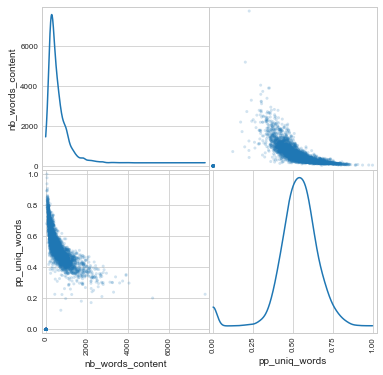

In [427]:
from pandas import scatter_matrix
figure1 = scatter_matrix(train_data.get(["nb_words_content", "pp_uniq_words"]), alpha=0.2,
               figsize=(6, 6), diagonal='kde')
plt.savefig(r"Pictures for report\figure_1.png")

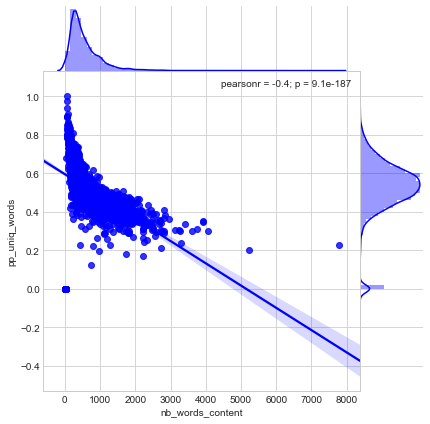

In [428]:
import seaborn.apionly as sns
sns.set_style('whitegrid')
sns.jointplot("nb_words_content", "pp_uniq_words", data = train_data, 
              kind='reg', size=6, space=0, color='b')
plt.savefig(r"Pictures for report\figure_2.png")

# 2. Cross-Validation

In [429]:
# let's redefine the cross-validation procedure with standardization
from sklearn import preprocessing
def cross_validate_scaling(design_matrix, labels, regressor, cv_folds):
    """ Perform a cross-validation and returns the predictions. 
    Use a scaler to scale the features to mean 0, standard deviation 1.
    
    Parameters:
    -----------
    design_matrix: (n_samples, n_features) np.array
        Design matrix for the experiment.
    labels: (n_samples, ) np.array
        Vector of labels.
    classifier:  Regressor instance; must have the following methods:
        - fit(X, y) to train the regressor on the data X, y
        - predict_proba(X) to apply the trained regressor to the data X and return predicted values
    cv_folds: sklearn cross-validation object
        Cross-validation iterator.
        
    Return:
    -------
    pred: (n_samples, ) np.array
        Vectors of predictions (same order as labels).
    """

    pred = np.zeros(labels.shape)
    for tr, te in cv_folds:
        scaler = preprocessing.StandardScaler()
        Xtr = scaler.fit_transform(design_matrix[tr,:])
        ytr =  labels[tr]
        Xte = scaler.transform(design_matrix[te,:])
        regressor.fit(Xtr, ytr)
        pred[te] = regressor.predict(Xte)
    return pred

def cross_validate_optimize(design_matrix,labels,regressor,cv_folds):
    pred = np.zeros(labels.shape)
    for (tr,te) in cv_folds:
        scaler = preprocessing.StandardScaler()
        X_tr = scaler.fit_transform(design_matrix[tr,:])
        y_tr = labels[tr]
        X_te = scaler.transform(design_matrix[te,:])
        
        regressor.fit(X_tr, y_tr)
        print(regressor.best_params_)
        pred[te]=regressor.best_estimator_.predict(X_te)
    return pred

# 3. Data transformation

## 3.1 Binarization and encoding categorical features

In [430]:
# Binarize weekday
weekday_or_weekend = (train_data['weekday'] > 4) * 1
weekday_or_weekend_data = pd.get_dummies(weekday_or_weekend, prefix='weekday_or_weekend', drop_first=True)

In [431]:
train_data = pd.concat([weekday_or_weekend_data, train_data], axis=1)

In [432]:
train_data.head()

,weekday_or_weekend_1,nb_words_title,nb_words_content,pp_uniq_words,pp_stop_words,pp_uniq_non-stop_words,nb_links,nb_outside_links,nb_images,nb_videos,...,pp_neg_words,pp_pos_words_in_nonneutral,ave_polar_pos,min_polar_pos,max_polar_pos,ave_polar_neg,min_polar_neg,max_polar_neg,subj_title,polar_title
2000,0,9,843,0.5358,2.092000e-09,0.7469,15.0,8,11,1,...,0.019230,0.7143,0.4437,0.03333,1.0,-0.3160,-0.8000,-0.05,0.0,0.0
2001,0,9,805,0.4196,2.165000e-09,0.5693,8.0,7,1,0,...,0.025710,0.5349,0.3081,0.05000,0.8,-0.3463,-0.7143,-0.10,0.9,0.3
2002,0,8,145,0.7594,1.163000e-08,0.8488,7.0,3,0,2,...,0.007519,0.8333,0.3673,0.13640,0.5,-0.2000,-0.2000,-0.20,0.0,0.0
2003,0,12,201,0.6359,9.259000e-09,0.8148,7.0,2,0,0,...,0.027030,0.7368,0.3721,0.13640,0.6,-0.4000,-0.4000,-0.40,0.0,0.0
2004,0,13,673,0.4609,2.500000e-09,0.5950,8.0,7,1,0,...,0.021440,0.5625,0.3500,0.05000,0.6,-0.2435,-0.8000,-0.10,0.0,0.0


In [433]:
weekday_or_weekend = (test_data['weekday'] > 4) * 1
weekday_or_weekend_data = pd.get_dummies(weekday_or_weekend, prefix='weekday_or_weekend', drop_first=True)
test_data = pd.concat([weekday_or_weekend_data, test_data], axis=1)
test_data.head()

,weekday_or_weekend_1,nb_words_title,nb_words_content,pp_uniq_words,pp_stop_words,pp_uniq_non-stop_words,nb_links,nb_outside_links,nb_images,nb_videos,...,pp_neg_words,pp_pos_words_in_nonneutral,ave_polar_pos,min_polar_pos,max_polar_pos,ave_polar_neg,min_polar_neg,max_polar_neg,subj_title,polar_title
0,0,12,258,0.5745,6.897000e-09,0.6897,4.0,2,0,0,...,0.01653,0.7143,0.2967,0.10000,1.0,-0.2344,-0.3,-0.1875,0.125,0.0
1,0,8,11,0.0000,1.000000e+00,0.0000,0.0,0,0,0,...,0.00000,0.0000,0.0000,0.00000,0.0,0.0000,0.0,0.0000,0.525,0.3
2,0,10,263,0.7249,6.623000e-09,0.8543,6.0,3,2,0,...,0.04701,0.5000,0.2617,0.10000,1.0,-0.2170,-0.5,-0.1250,0.000,-0.2
3,1,13,1281,0.4067,1.422000e-09,0.5903,29.0,4,1,1,...,0.01512,0.7500,0.3585,0.03333,1.0,-0.2403,-0.5,-0.0500,0.000,0.0
4,0,9,107,0.8152,1.538000e-08,0.8154,5.0,2,0,0,...,0.02151,0.6667,0.4881,0.28570,1.0,-0.8000,-1.0,-0.6000,0.000,0.0


In [434]:
# Get the weekday data and encode it using a dummy categorical encoding
weekday_data = pd.get_dummies(train_data['weekday'], prefix='weekday', drop_first=True)

# Get the rest of the data
other_data = train_data.drop(['weekday'], axis=1)

# Create a new data set by concatenation of the new weekday data and the old rest of the data
training_data = pd.concat([weekday_data, other_data], axis=1)

# Print the created training data.
training_data.head(5)

,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_or_weekend_1,nb_words_title,nb_words_content,pp_uniq_words,...,pp_neg_words,pp_pos_words_in_nonneutral,ave_polar_pos,min_polar_pos,max_polar_pos,ave_polar_neg,min_polar_neg,max_polar_neg,subj_title,polar_title
2000,1,0,0,0,0,0,0,9,843,0.5358,...,0.019230,0.7143,0.4437,0.03333,1.0,-0.3160,-0.8000,-0.05,0.0,0.0
2001,0,1,0,0,0,0,0,9,805,0.4196,...,0.025710,0.5349,0.3081,0.05000,0.8,-0.3463,-0.7143,-0.10,0.9,0.3
2002,0,0,0,0,0,0,0,8,145,0.7594,...,0.007519,0.8333,0.3673,0.13640,0.5,-0.2000,-0.2000,-0.20,0.0,0.0
2003,0,1,0,0,0,0,0,12,201,0.6359,...,0.027030,0.7368,0.3721,0.13640,0.6,-0.4000,-0.4000,-0.40,0.0,0.0
2004,0,1,0,0,0,0,0,13,673,0.4609,...,0.021440,0.5625,0.3500,0.05000,0.6,-0.2435,-0.8000,-0.10,0.0,0.0


In [435]:
# Get the catogary data and encode it using a dummy categorical encoding
category_data = pd.get_dummies(training_data['category'], prefix='category', drop_first=True)

# Get the rest of the data
other_data = training_data.drop(['category'], axis=1)

# Create a new data set by concatenation of the new weekday data and the old rest of the data
training_data = pd.concat([category_data, other_data], axis=1)

# Do the same things to the test data
# Weekday
weekday_data = pd.get_dummies(test_data['weekday'], prefix='weekday', drop_first=True)
other_data = test_data.drop(['weekday'], axis=1)
testing_data = pd.concat([weekday_data, other_data], axis=1)

# Category
category_data = pd.get_dummies(testing_data['category'], prefix='category', drop_first=True)
other_data = testing_data.drop(['category'], axis=1)
testing_data = pd.concat([category_data, other_data], axis=1)


In [436]:
training_data.head()

,category_1,category_2,category_3,category_4,category_5,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,...,pp_neg_words,pp_pos_words_in_nonneutral,ave_polar_pos,min_polar_pos,max_polar_pos,ave_polar_neg,min_polar_neg,max_polar_neg,subj_title,polar_title
2000,1,0,0,0,0,1,0,0,0,0,...,0.019230,0.7143,0.4437,0.03333,1.0,-0.3160,-0.8000,-0.05,0.0,0.0
2001,0,0,0,0,1,0,1,0,0,0,...,0.025710,0.5349,0.3081,0.05000,0.8,-0.3463,-0.7143,-0.10,0.9,0.3
2002,0,0,0,1,0,0,0,0,0,0,...,0.007519,0.8333,0.3673,0.13640,0.5,-0.2000,-0.2000,-0.20,0.0,0.0
2003,0,0,0,1,0,0,1,0,0,0,...,0.027030,0.7368,0.3721,0.13640,0.6,-0.4000,-0.4000,-0.40,0.0,0.0
2004,0,0,0,0,1,0,1,0,0,0,...,0.021440,0.5625,0.3500,0.05000,0.6,-0.2435,-0.8000,-0.10,0.0,0.0


In [437]:
testing_data.head()

,category_1,category_2,category_3,category_4,category_5,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,...,pp_neg_words,pp_pos_words_in_nonneutral,ave_polar_pos,min_polar_pos,max_polar_pos,ave_polar_neg,min_polar_neg,max_polar_neg,subj_title,polar_title
0,0,0,0,0,1,0,0,0,0,0,...,0.01653,0.7143,0.2967,0.10000,1.0,-0.2344,-0.3,-0.1875,0.125,0.0
1,0,0,0,0,1,0,1,0,0,0,...,0.00000,0.0000,0.0000,0.00000,0.0,0.0000,0.0,0.0000,0.525,0.3
2,0,0,0,0,1,0,0,1,0,0,...,0.04701,0.5000,0.2617,0.10000,1.0,-0.2170,-0.5,-0.1250,0.000,-0.2
3,0,0,0,1,0,0,0,0,0,0,...,0.01512,0.7500,0.3585,0.03333,1.0,-0.2403,-0.5,-0.0500,0.000,0.0
4,0,0,0,0,1,0,1,0,0,0,...,0.02151,0.6667,0.4881,0.28570,1.0,-0.8000,-1.0,-0.6000,0.000,0.0


In [438]:
X_tr = training_data.values
X_te = testing_data.values
y_tr = target_data['Prediction'].values

In [439]:
target_data['Prediction'].values

array([ 882, 1102, 1102, ..., 1401,  902, 1204], dtype=int64)

In [18]:
# set up folds for cross_validation
from sklearn import model_selection
kf = model_selection.KFold(n_splits=5)
kf.get_n_splits(X_tr)
folds = [(tr, te) for (tr, te) in kf.split(X_tr)]

## 3 Dimension reduction

### 3.2.1 Wrapper approach - recursive feature elimination

In [19]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X_tr)
X_scaled = std_scale.transform(X_tr)

In [29]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFECV(estimator, step=1, cv=5, scoring= 'neg_mean_squared_error')
selector = selector.fit(X_scaled, y_tr)
selector.support_
selector.ranking_

array([ 1,  1,  1,  1, 20,  2,  4,  3,  1,  1,  1,  1,  1,  1,  1, 17,  1,
        1,  1, 21, 24,  7,  1,  1, 10,  1,  1,  1, 23,  1,  5,  1,  1,  1,
        1,  1, 11,  1, 12,  1,  1, 14, 13, 15, 22,  1, 19,  1,  8,  9, 18,
       16,  6])

In [30]:
X_tr_rfe = selector.transform(X_scaled)

In [31]:
X_tr_rfe.shape

(5000, 30)

In [49]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_log_error

kf.get_n_splits(X_tr_rfe)
folds_svr_rfe = [(tr, te) for (tr, te) in kf.split(X_tr_rfe)]
svr = SVR(C = 1000)
ypred_svr_rfe = cross_validate_scaling(X_tr_rfe, y_tr, svr, folds_svr_rfe)
print(metrics.mean_squared_error(y_tr, ypred_svr_rfe))
print("Root mean squared logarithmic error: %.3f" % np.sqrt(metrics.mean_squared_error(np.log(y_tr), np.log(abs(ypred_svr_rfe)))))

62577586.8595
Root mean squared logarithmic error: 0.933


In [38]:
svr = SVR(C = 1000)
svr.fit(X_tr_rfe, y_tr)
X_te_scaled = std_scale.transform(X_te)
X_te_rfe = selector.transform(X_te_scaled)
pred_te = svr.predict(X_te_rfe)

In [39]:
pred_te

array([ 1361.63691257,  2105.05517645,  1393.27518881, ...,  2052.99114227,
        1434.74760213,  1536.31814697])

In [40]:
raw_data = {'Id': [i for i in range(2000)], 'Prediction': abs(pred_te) }
df = pd.DataFrame(raw_data, columns = ['Id', 'Prediction'])
df.to_csv("test.csv", sep=",", index=False,float_format='%.f')

### 3.2.2 Subset

In [500]:
features = [i for i in range(X_tr.shape[1])]

In [501]:
def processSubset(regr, feature_set = [0,1]):
    # Fit model on feature_set and calculate RSS
    X_tr_sub = X_tr[:, feature_set]
    ypred = cross_validate_scaling(X_tr_sub, y_tr_log, regr, folds)
    RMLSE = np.sqrt(metrics.mean_squared_error(np.log(y_tr), ypred))
    dict_test = {"model": feature_set, "RMLSE":RMLSE}
    return dict_test

In [502]:
def forward(predictors, regr = linear_model.LinearRegression()):
    # Pull out predictors we still need to process
    remaining_predictors = [p for p in features if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        predictors.append(p)
        results.append(processSubset(regr, predictors))
        predictors = predictors[:-1]
                       
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    # Choose the model with the highest RSS
    best_model = models.loc[models['RMLSE'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.", "RMSLE",models['RMLSE'].min() )
    # Return the best model, along with some other useful information about the model
    return best_model


In [503]:
import copy
def backward(predictors, regr = linear_model.LinearRegression()):
    # Pull out predictors we still need to process
    remaining_predictors = copy.deepcopy(predictors)
    tic = time.time()
    results = []
    for p in remaining_predictors:
        predictors.remove(p)
        results.append(processSubset(regr, copy.deepcopy(predictors)))
        predictors.append(p)
                       
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    # Choose the model with the highest RSS
    best_model = models.loc[models['RMLSE'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors), "predictors in", (toc-tic), "seconds.", "RMSLE",models['RMLSE'].min())
    # Return the best model, along with some other useful information about the model
    return best_model

In [504]:
import copy
#predictors = [i for i in range(X_tr.shape[1])]
#models3 = pd.DataFrame(columns=["model", "RMLSE"])
predictors = [31, 34]
models3 = pd.DataFrame(columns=["model", "RMLSE"])
for i in range(1,2):
    models3.loc[i] = backward(predictors, regr = SVR(C = 1.8))
    predictors = models3.loc[i].model

KeyboardInterrupt: 

In [337]:
models3

,model,RMLSE
1,[31],0.89724


In [332]:
models3.to_csv("model_backward(SVR).csv", sep=",", index=False,float_format='%.6f')

In [505]:
#predictors = []
#models2 = pd.DataFrame(columns=["model", "RMLSE"])
for i in range(18,50):
    models2.loc[i] = forward(predictors, SVR(C = 1.8))
    predictors = models2.loc[i].model[:]

Processed  53 models on 1 predictors in 154.88651251792908 seconds. RMSLE 0.896045390322
Processed  52 models on 2 predictors in 176.81277084350586 seconds. RMSLE 0.88553394461
Processed  51 models on 3 predictors in 172.6294617652893 seconds. RMSLE 0.87936291565
Processed  50 models on 4 predictors in 178.86010813713074 seconds. RMSLE 0.87379533088
Processed  49 models on 5 predictors in 176.49881553649902 seconds. RMSLE 0.871099895441
Processed  48 models on 6 predictors in 173.91976165771484 seconds. RMSLE 0.869056386878
Processed  47 models on 7 predictors in 172.3278033733368 seconds. RMSLE 0.867639047447
Processed  46 models on 8 predictors in 170.4105725288391 seconds. RMSLE 0.866759670624
Processed  45 models on 9 predictors in 176.66519331932068 seconds. RMSLE 0.86548768548
Processed  44 models on 10 predictors in 182.85548973083496 seconds. RMSLE 0.865948694692
Processed  43 models on 11 predictors in 180.66064190864563 seconds. RMSLE 0.864862806033
Processed  42 models on 12

KeyboardInterrupt: 

In [507]:
models2.to_csv("model_forward(SVR(C=1.8)).csv", sep=",", index=False,float_format='%.6f')

In [323]:
svr = SVR(C = 950)
pred = cross_validate_scaling(X_tr[:, subset], y_tr, svr, folds)
print("RMSLE: %.4f" % np.sqrt(metrics.mean_squared_error(np.log(y_tr), np.log(abs(pred)))))

RMSLE: 0.8617


In [57]:
X_tr_sub = X_tr[:, ]

In [59]:
X_tr_sub.shape
ypred = cross_validate_scaling(X_tr_sub, y_tr, SVR(), folds)
RMLSE = np.sqrt(metrics.mean_squared_error(np.log(y_tr), np.log(abs(ypred))))

In [66]:
import itertools

for combo in itertools.combinations([0,1,2,3,4], 2):
    print(combo)

(0, 1)
(0, 2)
(0, 3)
(0, 4)
(1, 2)
(1, 3)
(1, 4)
(2, 3)
(2, 4)
(3, 4)


### 3.2.3 PCA 

In [458]:
from sklearn import decomposition, preprocessing

std_scale = preprocessing.StandardScaler().fit(X_tr)
X_tr_scaled = std_scale.transform(X_tr)

pca = decomposition.PCA(n_components=10)
pca.fit(X_tr_scaled)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [459]:
X_tr_projected = pca.transform(X_tr_scaled)

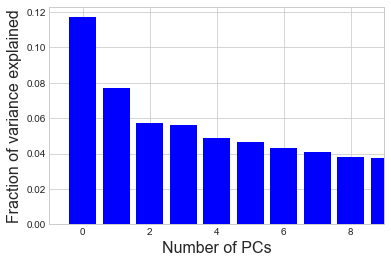

In [460]:
plt.bar(np.arange(10), pca.explained_variance_ratio_, color='blue')
plt.xlim([-1, 9])
plt.xlabel("Number of PCs", fontsize=16)
plt.ylabel("Fraction of variance explained", fontsize=16)
plt.savefig(r"Pictures for report\figure_3.png")

In [624]:
pca.singular_values_

array([ 176.09396734,  142.65389082,  123.08446274,  122.1175201 ,
        114.00601809,  111.29657912,  106.81337854,  103.91959132,
        100.32017192,   99.36548333])

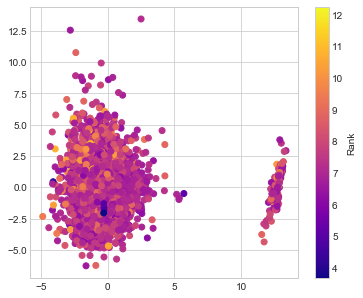

In [556]:
# create figure and axis objects
fig, ax = plt.subplots(figsize=(6, 5))
# create scatterplot on axis N.B. we record the return value to feed to the colorbar
cax = ax.scatter(X_tr_projected[:, 0], X_tr_projected[:, 1], c=y_tr_log,
                 cmap=plt.get_cmap('plasma'))
# Set axis limits
#ax.set_xlim([-5.5, 5.5])
#ax.set_ylim([-4, 4])
# Create color bar
plt.colorbar(cax, label='Rank')
#plt.savefig(r"Pictures for report\figure_4.png")

In [300]:
from sklearn.svm import SVR
from sklearn import decomposition, preprocessing
from sklearn.ensemble import RandomForestRegressor
class PCA_Regr():
    """ Class for PCA + regression:
    
    Attributes:
    -----------
    
    """
    def __init__(self, n_components = 10, regr = linear_model.LinearRegression()):
        self.coef_ = None
        self.n_components = n_components
        self.std = None
        self.pca = None
        self.regr = regr
        
    def fit(self, X, y):
        """ Fit the data (X, y).        
        """
        std_scale = preprocessing.StandardScaler().fit(X)
        self.std = std_scale
        X_scaled = self.std.transform(X)

        pca = decomposition.PCA(n_components=self.n_components)
        pca.fit(X_scaled)
        self.pca = pca
        
        X_projected = pca.transform(X_scaled)
        self.regr.fit(X_projected, y)
        
    def predict(self, X):
        """ Make predictions for data X.
    
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        
        Returns:
        -----
        y_pred: (num_samples, ) np.array
            Predictions
        """
        X_scaled = self.std.transform(X)
        X_projected = self.pca.transform(X_scaled)
        pred = self.regr.predict(X_projected)
        
        return pred

In [513]:
from sklearn import ensemble
error_pca = []
for k in range(1, 50):
    regr_pca = PCA_Regr(k, linear_model.LinearRegression())
    pred = cross_validate_scaling(X_tr, np.log(y_tr), regr_pca, folds)
    print("pca", k, "Root mean squared logarithmic error: %.3f" % np.sqrt(metrics.mean_squared_error(np.log(y_tr), np.log(abs(pred)))))
    error_pca.append(metrics.mean_squared_error(y_tr, np.exp(pred)))

pca 1 Root mean squared logarithmic error: 5.530
pca 2 Root mean squared logarithmic error: 5.530
pca 3 Root mean squared logarithmic error: 5.530
pca 4 Root mean squared logarithmic error: 5.530
pca 5 Root mean squared logarithmic error: 5.530
pca 6 Root mean squared logarithmic error: 5.530
pca 7 Root mean squared logarithmic error: 5.530
pca 8 Root mean squared logarithmic error: 5.530
pca 9 Root mean squared logarithmic error: 5.530
pca 10 Root mean squared logarithmic error: 5.530
pca 11 Root mean squared logarithmic error: 5.529
pca 12 Root mean squared logarithmic error: 5.529
pca 13 Root mean squared logarithmic error: 5.529
pca 14 Root mean squared logarithmic error: 5.529
pca 15 Root mean squared logarithmic error: 5.529
pca 16 Root mean squared logarithmic error: 5.529
pca 17 Root mean squared logarithmic error: 5.529
pca 18 Root mean squared logarithmic error: 5.529
pca 19 Root mean squared logarithmic error: 5.529
pca 20 Root mean squared logarithmic error: 5.529
pca 21 Ro

In [514]:
error_pca

[63607101.519321732,
 63241863.938382022,
 63235945.169031687,
 63124346.4391561,
 65369057.794161148,
 83078957.910361812,
 74968242.422808647,
 83395807.948258713,
 89400761.731798559,
 113124771.04535069,
 86799801.972103626,
 84162006.071242332,
 79579360.383059338,
 81307158.970219895,
 82148336.62382102,
 82187603.108835638,
 80831670.165043086,
 78213563.38849546,
 78839345.001562282,
 80796627.701091126,
 79864664.540034741,
 80334888.634218305,
 83479395.02601628,
 125320151.39843187,
 134889434.76547912,
 1168677804.6634395,
 809947212.36959243,
 589830226.74199176,
 721257977.20944583,
 885796178.65359604,
 839572523.74460232,
 709212561.42522717,
 711299362.21546268,
 628412834.62412143,
 638870357.3571732,
 660548192.89994586,
 663245147.31036723,
 653794414.26881194,
 662012505.94448757,
 744917914.69520879,
 643369866.7104913,
 649052911.90831566,
 654147663.79838061,
 284713320.11475408,
 282675129.09427208,
 320399585.76527464,
 286246155.21539456,
 302085522.51056087,

In [443]:
pred = cross_validate_scaling(X_tr, y_tr, linear_model.LinearRegression(), folds)
print("pca", k, "Root mean squared logarithmic error: %.3f" % np.sqrt(metrics.mean_squared_error(np.log(y_tr), np.log(abs(pred)))))

pca 49 Root mean squared logarithmic error: 1.086


In [441]:
y_tr

array([ 882, 1102, 1102, ..., 1401,  902, 1204], dtype=int64)

# 4. Model evaluation

## Linear regression

In [536]:
from sklearn import linear_model
regr_linear = linear_model.LinearRegression()
ypred_linear = cross_validate_scaling(X_tr, y_tr, regr_linear, folds)
print(metrics.mean_squared_error(y_tr, ypred_linear))
print("Root mean squared logarithmic error: %.3f" % np.sqrt(metrics.mean_squared_error(y_tr_log, np.log(abs(ypred_linear)))))


60728356.6695
Root mean squared logarithmic error: 1.086


## Lasso linear

In [537]:
from sklearn import linear_model

parameters = {'alpha': np.logspace(-4, 1, 10)}


regr_lasso = linear_model.Lasso()
regr_lasso_opt = model_selection.GridSearchCV(regr_lasso, parameters, cv=3)
regr_lasso_opt.fit(X_tr, y_tr_log)
ypred_lasso = cross_validate_scaling(X_tr, y_tr_log, regr_lasso_opt.best_estimator_, folds)
#ypred_lasso = cross_validate_scaling(X_tr, y_tr, regr_lasso, folds)
print(metrics.mean_squared_error(y_tr, ypred_lasso))
print("Root mean squared logarithmic error: %.3f" % np.sqrt(metrics.mean_squared_error(np.log(y_tr), ypred_lasso)))


C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


71750632.3922
Root mean squared logarithmic error: 0.876


In [538]:
regr_lasso_opt.best_estimator_

Lasso(alpha=0.001291549665014884, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

The L1-regularized logistic regression uses 46 features


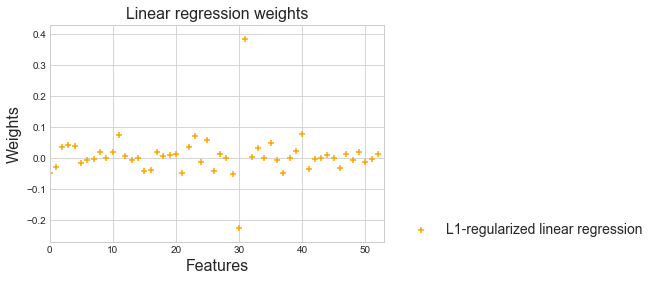

In [539]:
num_features = X_tr.shape[1]
plt.scatter(range(num_features), regr_lasso_opt.best_estimator_.coef_,#TODO, 
            color='orange', marker='+', label='L1-regularized linear regression')


plt.xlabel('Features', fontsize=16)
plt.ylabel('Weights', fontsize=16)
plt.title('Linear regression weights', fontsize=16)
plt.legend(fontsize=14, loc=(1.05, 0))
plt.xlim([0, num_features])

print("The L1-regularized logistic regression uses %d features" %len(np.where(regr_lasso_opt.best_estimator_.coef_ != 0)[0]))
plt.savefig(r"Pictures for report\figure_5.png")

In [554]:

parameters = {'alpha': np.logspace(-4, 1, 10)}

regr_ridge = linear_model.Ridge()
regr_ridge_opt = model_selection.GridSearchCV(regr_ridge, parameters, cv=3)
regr_ridge_opt.fit(X_tr, y_tr_log)
ypred_ridge = cross_validate_scaling(X_tr, y_tr_log, regr_ridge_opt.best_estimator_, folds)
#ypred_lasso = cross_validate_scaling(X_tr, y_tr, regr_lasso, folds)
print(metrics.mean_squared_error(y_tr, ypred_ridge))
print("Root mean squared logarithmic error: %.5f" % np.sqrt(metrics.mean_squared_error(np.log(y_tr), ypred_ridge)))


71750624.4686
Root mean squared logarithmic error: 0.87776


In [543]:
len(np.where(regr_ridge_opt.best_estimator_.coef_ != 0)[0])

53

In [467]:
X_tr_lasso = X_tr[:,np.where(regr_lasso_opt.best_estimator_.coef_ != 0)[0]]
y_tr_lasso = y_tr

In [468]:
X_tr_lasso.shape

(5000, 5)

## KNN

In [552]:
from sklearn.neighbors import KNeighborsRegressor

parameters = {'n_neighbors': [55,56,57,58,59]}

neigh = KNeighborsRegressor()
neigh_opt = model_selection.GridSearchCV(neigh, parameters, cv=3)
neigh_opt.fit(X_tr, y_tr_log)
print(neigh_opt.best_estimator_)
ypred_neigh = cross_validate_scaling(X_tr, y_tr_log, neigh_opt.best_estimator_, folds)

print(metrics.mean_squared_error(y_tr, ypred_neigh))
print("Root mean squared logarithmic error: %.5f" % np.sqrt(metrics.mean_squared_error(y_tr_log, ypred_neigh)))


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=57, p=2,
          weights='uniform')
71751183.2066
Root mean squared logarithmic error: 0.87374


In [553]:
np.exp(ypred_neigh)

array([ 1321.05639432,  1339.49574005,  1593.76640989, ...,  2226.76752658,
        1771.85131302,  1903.42269818])

In [562]:
error_pca = []
for k in range(1, 50):
    regr_pca = PCA_Regr(k, neigh_opt.best_estimator_)
    pred = cross_validate_scaling(X_tr, y_tr_log, regr_pca, folds)
    print("pca", k, "Root mean squared logarithmic error: %.5f" % np.sqrt(metrics.mean_squared_error(np.log(y_tr), pred)))
    error_pca.append(metrics.mean_squared_error(y_tr, pred))

pca 1 Root mean squared logarithmic error: 0.91698
pca 2 Root mean squared logarithmic error: 0.90300
pca 3 Root mean squared logarithmic error: 0.90023
pca 4 Root mean squared logarithmic error: 0.88668
pca 5 Root mean squared logarithmic error: 0.87795
pca 6 Root mean squared logarithmic error: 0.87513
pca 7 Root mean squared logarithmic error: 0.87502
pca 8 Root mean squared logarithmic error: 0.87227
pca 9 Root mean squared logarithmic error: 0.87226
pca 10 Root mean squared logarithmic error: 0.87226
pca 11 Root mean squared logarithmic error: 0.87262
pca 12 Root mean squared logarithmic error: 0.87223
pca 13 Root mean squared logarithmic error: 0.87124
pca 14 Root mean squared logarithmic error: 0.87176
pca 15 Root mean squared logarithmic error: 0.87108
pca 16 Root mean squared logarithmic error: 0.87191
pca 17 Root mean squared logarithmic error: 0.87210
pca 18 Root mean squared logarithmic error: 0.87284
pca 19 Root mean squared logarithmic error: 0.87253
pca 20 Root mean squa

In [564]:
predictors_knn = []
models2_knn = pd.DataFrame(columns=["model", "RMLSE"])
for i in range(1,50):
    models2_knn.loc[i] = forward(predictors_knn, neigh_opt.best_estimator_)
    predictors_knn = models2.loc[i].model[:]

Processed  53 models on 1 predictors in 6.217549562454224 seconds. RMSLE 0.889403701206
Processed  52 models on 2 predictors in 3.9744253158569336 seconds. RMSLE 0.875040193496
Processed  51 models on 3 predictors in 5.570129156112671 seconds. RMSLE 0.869382014891
Processed  50 models on 4 predictors in 7.153124094009399 seconds. RMSLE 0.863890097808
Processed  49 models on 5 predictors in 10.275127172470093 seconds. RMSLE 0.863242033673
Processed  48 models on 6 predictors in 12.535651922225952 seconds. RMSLE 0.861047886028
Processed  47 models on 7 predictors in 14.875962495803833 seconds. RMSLE 0.862904831518
Processed  46 models on 8 predictors in 18.02273941040039 seconds. RMSLE 0.861954203095
Processed  45 models on 9 predictors in 22.700130224227905 seconds. RMSLE 0.862142457192
Processed  44 models on 10 predictors in 25.945928812026978 seconds. RMSLE 0.865429684072
Processed  43 models on 11 predictors in 28.49800968170166 seconds. RMSLE 0.865611957234
Processed  42 models on 

KeyError: 'the label [19] is not in the [index]'

In [565]:
models2_knn

,model,RMLSE
1,[31],0.889404
2,"[31, 34]",0.875040
3,"[31, 34, 11]",0.869382
4,"[31, 34, 23, 11]",0.863890
5,"[31, 34, 23, 29, 11]",0.863242
6,"[31, 34, 23, 29, 11, 0]",0.861048
7,"[31, 34, 23, 29, 11, 25, 3]",0.862905
8,"[31, 34, 23, 29, 11, 25, 3, 44]",0.861954
9,"[31, 34, 23, 29, 11, 25, 3, 40, 17]",0.862142
10,"[31, 34, 23, 29, 11, 25, 3, 40, 50, 17]",0.865430


In [572]:
X_tr[:,31]

array([ 2422.,  2420.,  2854., ...,  2520.,  5351.,  1691.])

In [596]:
training_data.columns[15]

'pp_stop_words'

In [579]:
training_data['nb_avea_avek']

2000     2422.0
2001     2420.0
2002     2854.0
2003     2225.0
2004     2363.0
2005     3969.0
2006     1881.0
2007     2281.0
2008    10310.0
2009     5861.0
2010     4008.0
2011     3699.0
2012     1826.0
2013     2430.0
2014     5736.0
2015     3562.0
2016     3493.0
2017     5772.0
2018     2840.0
2019     6039.0
2020     1948.0
2021     4031.0
2022     4198.0
2023     3507.0
2024     2440.0
2025     2124.0
2026     2732.0
2027     3129.0
2028     3186.0
2029     2636.0
         ...   
6970     3446.0
6971     2130.0
6972     2119.0
6973     1763.0
6974     2558.0
6975     2245.0
6976     2110.0
6977     3310.0
6978     3417.0
6979     3715.0
6980     4779.0
6981     2768.0
6982     3774.0
6983     2683.0
6984     5091.0
6985     3352.0
6986     2964.0
6987     3081.0
6988     2577.0
6989     2557.0
6990     2855.0
6991     5883.0
6992     2820.0
6993        0.0
6994     5239.0
6995      776.1
6996     2712.0
6997     2520.0
6998     5351.0
6999     1691.0
Name: nb_avea_avek, Leng

In [588]:
feature_data.loc[20]

feature_names                                               nb_avea_avek
feature_description    Average number of average share counts per key...
Name: 20, dtype: object

## SVR

In [604]:
svr = SVR(C=1.8, kernel='rbf')
ypred_svr = cross_validate_scaling(X_tr, y_tr_log, svr, folds)
print("Root mean squared logarithmic error: %.5f" % np.sqrt(metrics.mean_squared_error(y_tr_log, ypred_svr)))

Root mean squared logarithmic error: 0.87954


In [589]:
from sklearn.svm import SVR

parameters = {'C': [1.8], 'kernel':['rbf', 'linear']}
svr = SVR()
svr_opt = model_selection.GridSearchCV(svr, parameters, cv=3)
svr_opt.fit(X_tr, y_tr_log)
print(svr_opt.best_estimator_)
ypred_svr = cross_validate_scaling(X_tr, y_tr_log, svr_opt.best_estimator_, folds)
print("Root mean squared logarithmic error: %.3f" % np.sqrt(metrics.mean_squared_error(y_tr_log, ypred_svr)))

KeyboardInterrupt: 

In [495]:
svr_opt.best_estimator_

SVR(C=1.8888888888888888, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto', kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
  verbose=False)

In [112]:
from sklearn.svm import SVR
kf.get_n_splits(X_tr_lasso)
folds_svr_lasso = [(tr, te) for (tr, te) in kf.split(X_tr_lasso)]
svr = SVR(C = 1000)
ypred_svr_lasso = cross_validate_scaling(X_tr_lasso, y_tr_lasso, svr, folds_svr_lasso)
print(metrics.mean_squared_error(y_tr_lasso, ypred_svr_lasso))
print("Root mean squared logarithmic error: %.3f" % np.sqrt(metrics.mean_squared_error(np.log(y_tr_lasso), np.log(abs(ypred_svr_lasso)))))


63068043.7865
Root mean squared logarithmic error: 0.876


In [106]:
error_pca_svr_lasso = []
svr = SVR(C=1000)
for k in range(1, 2):
    regr_pca = PCA_Regr(k, svr)
    pred_pca_svr_lasso = cross_validate_scaling(X_tr_lasso, y_tr_lasso, regr_pca, folds_svr_lasso)# TODO
    print("pca", k, "Root mean squared logarithmic error: %.3f" % np.sqrt(metrics.mean_squared_error(np.log(y_tr_lasso), np.log(abs(pred_pca_svr_lasso)))))

pca 1 Root mean squared logarithmic error: 0.933


In [113]:
from sklearn import ensemble, model_selection
rf = ensemble.RandomForestRegressor()
ypred_rf_lasso = cross_validate_scaling(X_tr_lasso, y_tr_lasso, rf, folds_svr_lasso)
print(metrics.mean_squared_error(y_tr_lasso, ypred_rf_lasso))
print("Root mean squared logarithmic error: %.3f" % np.sqrt(metrics.mean_squared_error(np.log(y_tr_lasso), np.log(abs(ypred_rf_lasso)))))


69745722.4903
Root mean squared logarithmic error: 1.092


In [26]:
parameters = {'n_estimators':[i for i in range(1,20)]}
classifier = ensemble.RandomForestRegressor()

RF_opt = model_selection.GridSearchCV(classifier, parameters, cv=3) 

In [27]:
rf = ensemble.RandomForestRegressor()
pred = cross_validate(X_tr, y_tr, rf, folds)
print("RMSLE: %.3f" % np.sqrt(metrics.mean_squared_error(np.log(y_tr), np.log(abs(pred)))))

RMSLE: 1.107


In [48]:
np.logspace(2, 3, 20)

array([  100.        ,   112.88378917,   127.42749857,   143.84498883,
         162.37767392,   183.29807108,   206.91380811,   233.57214691,
         263.66508987,   297.63514416,   335.98182863,   379.26901907,
         428.13323987,   483.29302386,   545.55947812,   615.84821107,
         695.19279618,   784.75997035,   885.86679041,  1000.        ])

In [59]:
from sklearn.svm import SVR
parameters = {'C': np.logspace(3, 4, 20), 'kernel': ['rbf']}
svr = SVR()
svr_opt = model_selection.GridSearchCV(svr, parameters, cv=folds)  
svr_opt.fit(X_tr_scaled, y_tr)
pred_te = svr_opt.best_estimator_.predict(X_te_scaled)

In [65]:
pred_tr = svr_opt.best_estimator_.predict(X_scaled)
print("RMSLE: %.3f" % np.sqrt(metrics.mean_squared_error(np.log(y_tr), np.log(pred_tr))))

RMSLE: 0.562


In [67]:
svr_opt.best_estimator_

SVR(C=10000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [72]:
from sklearn.svm import SVR
error_svr = {}
for e in np.linspace(0.01, 1, 20):
    svr = SVR(C = 1000, epsilon= e)
    pred = cross_validate(X_tr, y_tr, svr, folds)
    print("RMSLE: %.3f" % np.sqrt(metrics.mean_squared_error(np.log(y_tr), np.log(abs(pred)))))
    error_svr[str(e)] = np.sqrt(metrics.mean_squared_error(np.log(y_tr), np.log(abs(pred))))

RMSLE: 0.873
RMSLE: 0.873
RMSLE: 0.873
RMSLE: 0.873
RMSLE: 0.873
RMSLE: 0.873
RMSLE: 0.873
RMSLE: 0.873
RMSLE: 0.873
RMSLE: 0.873
RMSLE: 0.873
RMSLE: 0.873
RMSLE: 0.873
RMSLE: 0.873
RMSLE: 0.873
RMSLE: 0.873
RMSLE: 0.873
RMSLE: 0.873
RMSLE: 0.873
RMSLE: 0.873


In [50]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=30)
pred = cross_validate(X_tr, y_tr, knn, folds)
print("RMSLE: %.3f" % np.sqrt(metrics.mean_squared_error(np.log(y_tr), np.log(abs(pred)))))

RMSLE: 1.005


In [29]:
from sklearn.svm import SVR
svr = SVR(C = 300, kernel = 'rbf')


In [30]:
std_scale = preprocessing.StandardScaler().fit(X_tr)
X_scaled = std_scale.transform(X_tr)
X_te_scaled = std_scale.transform(X_te)

In [31]:
svr.fit(X_scaled, y_tr)

SVR(C=300, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [34]:
pred_te = svr.predict(X_te_scaled)

## 4.2 Random forest regressor

In [606]:
from sklearn import model_selection, ensemble
# Define the grid of parameters to test
param_grid = {'max_features':['sqrt','log2'],'min_samples_leaf':[4,5,6], 'n_estimators':[200,250,350,400]}# TODO
y_tr_log = np.log(y_tr)

# Initialize a GridSearchCV object that will be used to cross-validate
# a random forest with these parameters.
rf = model_selection.GridSearchCV(ensemble.RandomForestRegressor(), param_grid, scoring='neg_mean_squared_error')
rf.fit(X_tr, y_tr_log)
print(rf.best_estimator_)

pred_rf_log = cross_validate_scaling(X_tr, y_tr_log, rf.best_estimator_, folds)
print("RMSLE: %.5f" % np.sqrt(metrics.mean_squared_error(y_tr_log, pred_rf_log)))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
RMSLE: 0.84944


In [384]:
rf.best_estimator_.feature_importances_

array([  5.33035167e-03,   1.47558914e-03,   2.39819865e-03,
         3.94288166e-03,   4.39661113e-03,   2.14507015e-03,
         1.82354503e-03,   2.26806539e-03,   1.65630533e-03,
         2.24725863e-03,   4.30609264e-03,   1.00030772e-02,
         1.28173128e-02,   2.62376091e-02,   2.57934050e-02,
         8.95925697e-05,   2.54169621e-02,   2.15388416e-02,
         1.80731598e-02,   1.71646762e-02,   8.67863213e-03,
         1.35716295e-03,   9.31477572e-03,   6.29514617e-03,
         2.97588740e-02,   3.41916032e-02,   1.63775694e-02,
         6.25671427e-03,   2.83049177e-02,   2.89792895e-02,
         5.91825584e-02,   7.43587730e-02,   3.89001829e-02,
         3.54047523e-02,   4.75235302e-02,   2.39479409e-02,
         2.62788934e-02,   2.94543630e-02,   2.89543448e-02,
         2.84918145e-02,   3.29373641e-02,   2.68936852e-02,
         2.34420313e-02,   2.29795694e-02,   2.20638310e-02,
         2.53416880e-02,   1.01917795e-02,   9.67966954e-03,
         2.18261745e-02,

In [352]:
print("RMSLE: %.5f" % np.sqrt(metrics.mean_squared_error(y_tr_log, pred_rf_log)))

RMSLE: 0.85035


In [590]:
rf_best = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
#RMSLE: 0.84806
pred_rf_best_log = cross_validate_scaling(X_tr, y_tr_log, rf_best, folds)
print("RMSLE: %.5f" % np.sqrt(metrics.mean_squared_error(y_tr_log, pred_rf_best_log)))

RMSLE: 0.84848


In [638]:
select = rf_best.feature_importances_.argsort()

In [639]:
select = select[::-1]

In [640]:
select

array([31, 30, 34, 32, 33, 25, 40, 29, 37, 24, 28, 39, 38, 14, 36, 41, 13,
       16, 35, 45, 42, 48, 43, 17, 44, 18, 19, 26, 51, 52, 49, 50, 12, 11,
       20, 47, 46, 22, 23,  0, 27,  4,  3, 10,  2,  9,  6,  7,  5,  8,  1,
       21, 15], dtype=int64)

In [ ]:
tree_based_feature_selection = SelectFromModel(estimator=rf.best_estimator_, 
                                               threshold='mean')
tree_based_feature_selection.fit(X, y)
print('number of selected features by random forest:', len(tree_based_feature_selection.get_support(indices=True)))


## KNN + Select( by random forest)

In [655]:
neigh = KNeighborsRegressor(n_neighbors= 57)
subset = select[:6]
X_tr_sub = X_tr[:, subset]
X_te_sub = X_te[:, subset]

pred_neigh_sub = cross_validate_scaling(X_tr_sub, y_tr_log, neigh, folds)
print("RMSLE: %.5f" % np.sqrt(metrics.mean_squared_error(y_tr_log, pred_neigh_sub)))




RMSLE: 0.87467


In [656]:
subset

array([31, 30, 34, 32, 33, 25], dtype=int64)

In [657]:
select

array([31, 30, 34, 32, 33, 25, 40, 29, 37, 24, 28, 39, 38, 14, 36, 41, 13,
       16, 35, 45, 42, 48, 43, 17, 44, 18, 19, 26, 51, 52, 49, 50, 12, 11,
       20, 47, 46, 22, 23,  0, 27,  4,  3, 10,  2,  9,  6,  7,  5,  8,  1,
       21, 15], dtype=int64)

## Random forest select

In [660]:
rf_sub = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

subset = select[:40]
X_tr_sub = X_tr[:, subset]
X_te_sub = X_te[:, subset]

pred_rf_sub = cross_validate_scaling(X_tr_sub, y_tr_log, rf_sub, folds)
print("RMSLE: %.5f" % np.sqrt(metrics.mean_squared_error(y_tr_log, pred_rf_sub)))




RMSLE: 0.85061


# 5. Output

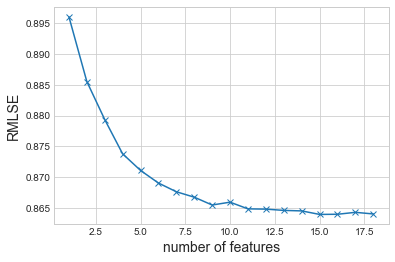

In [625]:
data_fig_6=pd.read_csv('CSV_for_report/model_forward(SVR(C=1.8)).csv',sep=',')
data_fig_6.head(5)
fig_6_y=np.array(data_fig_6['RMLSE'])
plt.plot(range(len(fig_6_y))+np.ones(len(fig_6_y)),fig_6_y,'x-')
#plt.title('figure 6',fontsize=14)
plt.ylabel('RMLSE',fontsize=14)
plt.xlabel('number of features',fontsize=14)
plt.savefig(r"Pictures for report\figure_6.png")

In [597]:
std_scale = preprocessing.StandardScaler().fit(X_tr)
X_tr_scaled = std_scale.transform(X_tr)
X_te_scaled = std_scale.transform(X_te)


In [598]:
rf_best.fit(X_tr_scaled, y_tr_log)
pred_te_log = rf.predict(X_te_scaled)
pred_te = np.exp(pred_te_log)

In [361]:
rf.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [599]:
pred_te

array([ 1472.18569451,  1688.94439674,  1525.76206277, ...,  1796.76998684,
        1363.10157475,  1519.0104653 ])

In [626]:
subset = [31, 34, 23, 29, 11, 0]
X_tr_sub = X_tr[:, subset]
X_te_sub = X_te[:, subset]

std_scale = preprocessing.StandardScaler().fit(X_tr_sub)
X_tr_sub_scaled = std_scale.transform(X_tr_sub)
X_te_sub_scaled = std_scale.transform(X_te_sub)


In [628]:
X_te_sub_scaled.shape


(2000, 6)

In [629]:
neigh_sub = KNeighborsRegressor(n_neighbors=57)
neigh_sub.fit(X_tr_sub_scaled, y_tr_log)
pred_te_log = neigh_sub.predict(X_te_sub_scaled)
pred_te = np.exp(pred_te_log)



In [630]:
pred_te

array([ 1564.52140114,  2116.5234108 ,  1561.31201256, ...,  2237.75136001,
        1816.99501561,  1772.19876557])

In [326]:
svr = SVR(C = 950)
svr.fit(X_tr_sub_scaled, y_tr)
pred_te = svr.predict(X_te_sub_scaled)

In [327]:
pred_te

array([ 1169.96126089,  1700.20922434,  1483.33612902, ...,  1775.82498456,
        1302.98956112,  1647.96449296])

In [631]:
raw_data = {'Id': [i for i in range(2000)], 'Prediction': np.absolute(pred_te) }
df = pd.DataFrame(raw_data, columns = ['Id', 'Prediction'])
df.to_csv("test.csv", sep=",", index=False,float_format='%.f')